In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from PIL import Image
import cv2

%matplotlib inline

## Path initialization

In [2]:
#Path initialization
current = os.getcwd()
flowers_path = '/flowers'
flower_types = os.listdir(current + flowers_path) #returns the list of species based on the sub repo


In [3]:
flower_types

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

## Generate a dataframe for all images, taking the category into account

In [4]:
flowers = []

for species in flower_types:
    # Get all the file names
    all_flowers = os.listdir(current + flowers_path + '/' + species)
    # Add them to the list
    for flower in all_flowers:
        flowers.append((species, str(current + flowers_path + '/' + species) + '/' + flower))

# Build a dataframe        
flowers = pd.DataFrame(data=flowers, columns=['category', 'image'], index=None)
flowers.head(10)

,category,image
0,daisy,C:\Users\EliseIronhack\0323_2020DATAPAR\Projec...
1,daisy,C:\Users\EliseIronhack\0323_2020DATAPAR\Projec...
2,daisy,C:\Users\EliseIronhack\0323_2020DATAPAR\Projec...
3,daisy,C:\Users\EliseIronhack\0323_2020DATAPAR\Projec...
4,daisy,C:\Users\EliseIronhack\0323_2020DATAPAR\Projec...
5,daisy,C:\Users\EliseIronhack\0323_2020DATAPAR\Projec...
6,daisy,C:\Users\EliseIronhack\0323_2020DATAPAR\Projec...
7,daisy,C:\Users\EliseIronhack\0323_2020DATAPAR\Projec...
8,daisy,C:\Users\EliseIronhack\0323_2020DATAPAR\Projec...
9,daisy,C:\Users\EliseIronhack\0323_2020DATAPAR\Projec...


In [5]:
flowers.category.value_counts()

dandelion    1052
tulip         984
rose          784
daisy         769
sunflower     734
Name: category, dtype: int64

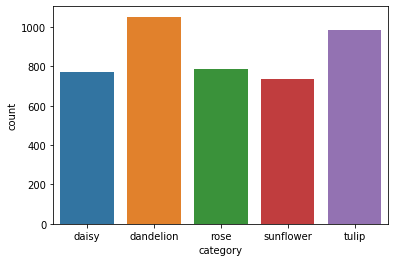

In [6]:
sns.countplot(flowers.category)

### Plot some random images from our dataset

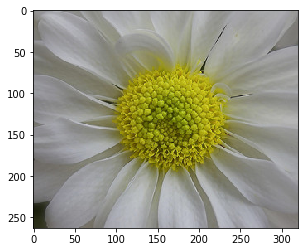

In [7]:
pil_im = Image.open(flowers.image[0], 'r')
plt.imshow(np.asarray(pil_im))

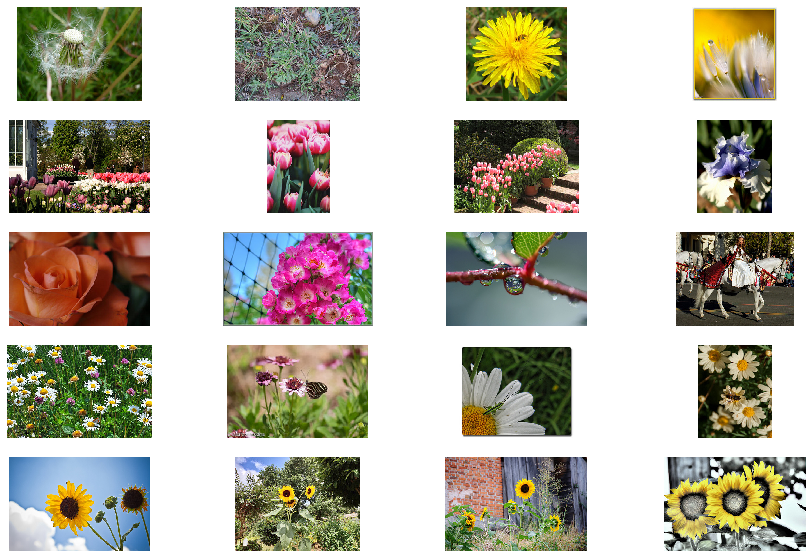

In [8]:
random_samples = []

# Get samples fom each category 
for category in flowers.category.value_counts().index:
    samples = flowers['image'][flowers['category'] == category].sample(4).values
    for sample in samples:
        random_samples.append(sample)

# Plot the samples
f, ax = plt.subplots(5,4, figsize=(15,10))
for i,sample in enumerate(random_samples):
    ax[i//4, i%4].imshow(np.asarray(Image.open(random_samples[i])))
    ax[i//4, i%4].axis('off')
plt.show()    

# DATA PREPARATION

In [9]:
flowers.category.unique()

array(['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'], dtype=object)

In [ ]:
#dct = {'daisy' : 1, 'dandelion' : 2, 'rose' : 3, 'sunflower' : 4, 'tulip' : 5}
#flowers['labels'] = flowers.category.map(dct)

In [10]:
#Transforming the images into a single array
dim = (150,150)
images_array = np.array([np.array(cv2.resize(cv2.imread(img, cv2.IMREAD_COLOR), dim)) for img in flowers.image])

In [115]:
images_array.shape

(4323, 150, 150, 3)

In [11]:
#ENCODING THE LABELS
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
#labels_array = np.array([label for label in flowers.labels])
labels_ls = [label for label in flowers.category]
Encod = LabelEncoder()
labels = Encod.fit_transform(labels_ls)
labels_array = to_categorical(labels, 5)


Using TensorFlow backend.


In [12]:
labels_array.shape

(4323, 5)

In [13]:
images_array[1].shape

(150, 150, 3)

# SPLITTING THE DATA

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(images_array, labels_array, test_size=0.33, random_state=42)

In [16]:
X_train = X_train /255
X_test = X_test /255

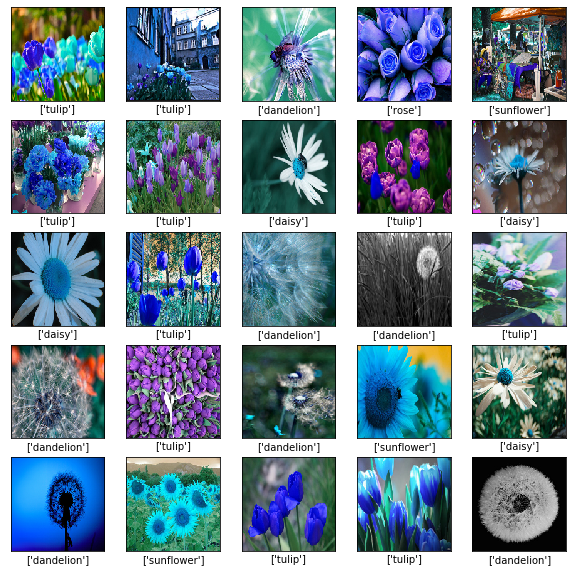

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(Encod.inverse_transform([np.argmax(y_train[i])]))
plt.show()

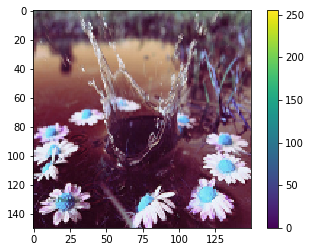

In [18]:
plt.figure()
plt.imshow(images_array[2])
plt.colorbar()
plt.grid(False)
plt.show()

## Trying some CNN

In [24]:
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras import layers
from keras import models
from keras import optimizers
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense
from keras.optimizers import SGD
import tensorflow as tf

In [169]:
model = models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "sigmoid"))

In [170]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.0, nesterov=True)
model.compile(optimizer='Adam' ,loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
model = models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [27]:
model.compile(optimizer='Adam' ,loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.3, shuffle = True)

Train on 2027 samples, validate on 869 samples
Epoch 1/10
2027/2027 [==============================] - 184s 91ms/step - loss: 1.1434 - accuracy: 0.5220 - val_loss: 1.1110 - val_accuracy: 0.5558
Epoch 2/10
2027/2027 [==============================] - 165s 81ms/step - loss: 0.9834 - accuracy: 0.6088 - val_loss: 1.0133 - val_accuracy: 0.5972
Epoch 3/10
2027/2027 [==============================] - 178s 88ms/step - loss: 0.8564 - accuracy: 0.6798 - val_loss: 0.9058 - val_accuracy: 0.6421
Epoch 4/10
2027/2027 [==============================] - 155s 76ms/step - loss: 0.7565 - accuracy: 0.7030 - val_loss: 0.9230 - val_accuracy: 0.6536
Epoch 5/10
2027/2027 [==============================] - 149s 73ms/step - loss: 0.6725 - accuracy: 0.7563 - val_loss: 0.9379 - val_accuracy: 0.6203
Epoch 6/10
2027/2027 [==============================] - 148s 73ms/step - loss: 0.4831 - accuracy: 0.8244 - val_loss: 0.9631 - val_accuracy: 0.6594
Epoch 7/10
2027/2027 [==============================] - 150s 74ms/step 

In [300]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8270496129989624


## Displaying the Model Training History

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


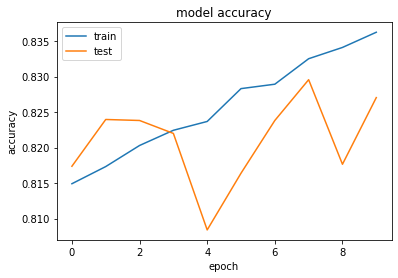

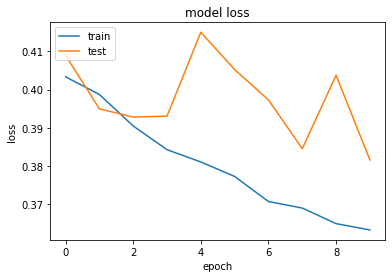

In [309]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Doing prediction

In [301]:
probability_model = models.Sequential([model, 
                                         layers.Softmax()])

In [302]:
predictions = probability_model.predict(X_test)

In [303]:
predictions

array([[0.21298842, 0.22241996, 0.19120617, 0.18236561, 0.1910199 ],
       [0.17075604, 0.17099275, 0.18603069, 0.2488777 , 0.22334284],
       [0.21545327, 0.20231661, 0.22500308, 0.17094022, 0.18628682],
       ...,
       [0.15796556, 0.1573622 , 0.17290589, 0.19213209, 0.3196342 ],
       [0.19276218, 0.17836007, 0.18795359, 0.21464165, 0.22628249],
       [0.17716652, 0.18587534, 0.1671397 , 0.25728416, 0.21253422]],
      dtype=float32)

In [200]:
predictions.shape

(1427, 5)

In [207]:
pred_digits = np.argmax(predictions, axis=1)

In [212]:
pred_digits

array([1, 3, 1, ..., 4, 4, 1], dtype=int64)

In [194]:
np.argmax(predictions[0])

1

In [201]:
predictions[0]

array([0.20696704, 0.26075798, 0.17197601, 0.17220744, 0.18809155],
      dtype=float32)

## Evaluating the model predictions with some visualisations

In [282]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(Encod.inverse_transform([predicted_label]),
                                100*np.max(predictions_array),
                                Encod.inverse_transform([true_label]),
                                color=color))

In [283]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

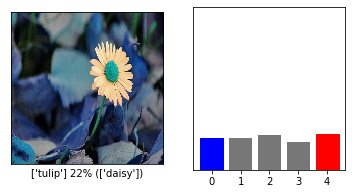

In [304]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

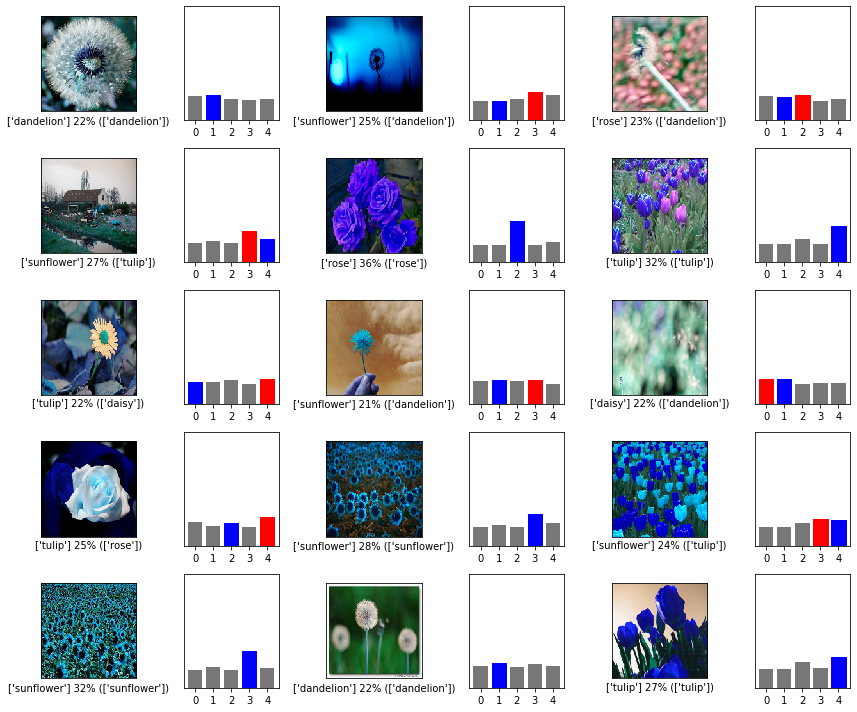

In [305]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [306]:
np.argmax(y_test[0])

1

In [263]:
predictions[i]

array([0.20696704, 0.26075798, 0.17197601, 0.17220744, 0.18809155],
      dtype=float32)

In [264]:
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [213]:
Encod.inverse_transform(pred_digits)

array(['dandelion', 'sunflower', 'dandelion', ..., 'tulip', 'tulip',
       'dandelion'], dtype='<U9')

In [214]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

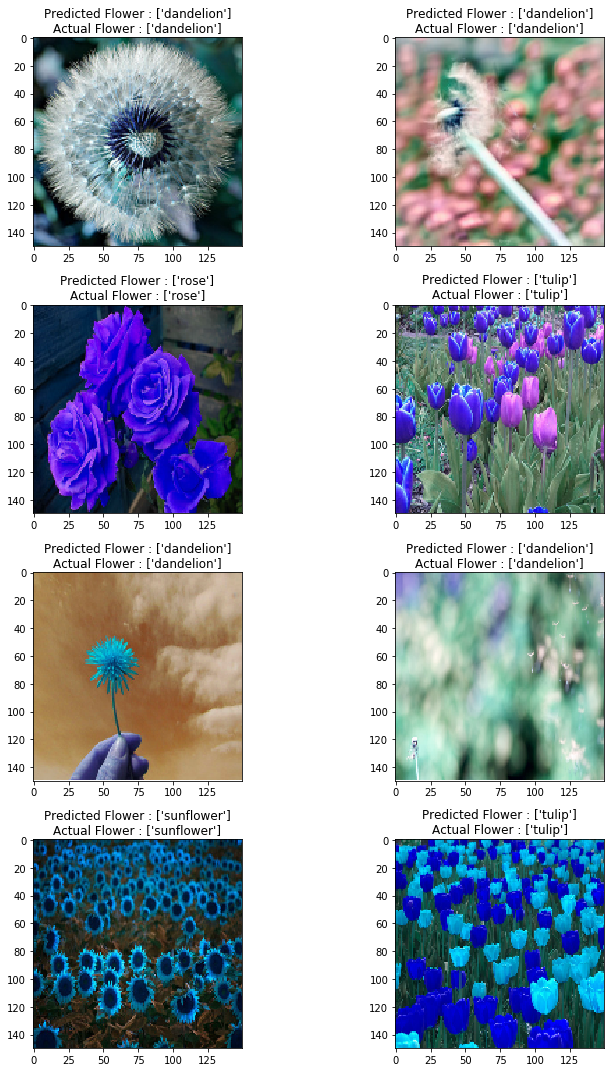

In [243]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(Encod.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(Encod.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

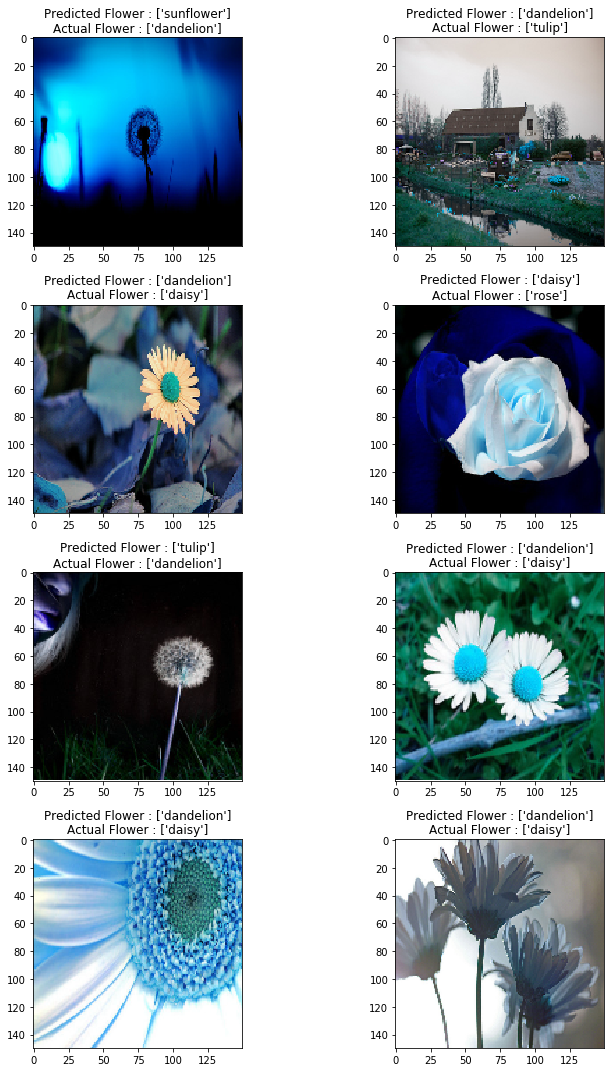

In [245]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(Encod.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(Encod.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

In [226]:
Encod.inverse_transform([pred_digits[prop_class[0]]])

array(['dandelion'], dtype='<U9')

In [233]:
([y_test[prop_class[0]]])

[array([0., 1., 0., 0., 0.], dtype=float32)]

In [237]:
pred_digits[prop_class[0]]

1

In [242]:
Encod.inverse_transform([np.argmax(y_test[prop_class[0]])])

array(['dandelion'], dtype='<U9')

## Use the trained model to predict on an image from the test set

In [291]:
# Grab an image from the test dataset.
img = X_test[1]

print(img.shape)

(150, 150, 3)


In [292]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 150, 150, 3)


In [293]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.17714049 0.19572364 0.17846066 0.2354264  0.21324877]]


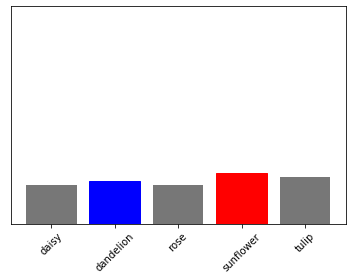

In [295]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(5), class_names, rotation=45)